In [98]:
#all imports for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df  = pd.read_csv('data_no_spaces_all_features_correct_dates.csv')
df.columns

Index(['Unnamed: 0', 'channelDescription', 'channelJoinedDate',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount',
       'likes_per_subscriber', 'comments_per_subscriber',
       'views_per_subscriber', 'duration_in_seconds', 'datetime_date',
       'hashtags', 'comm_to_views', 'likes_to_views', 'popular_brand',
       'has_title_affiliate', 'has_description_affiliate',
       'has_channel_description_affiliate', 'has_any_affiliate',
       'has_business_inquiry', 'engagement_per_subscriber'],
      dtype='object')

In [102]:
# print columns title, text, id, order, likes, viewCount, commentsCount
subdf = df[['title', 'text', 'id', 'likes', 'viewCount', 'commentsCount', 'duration_in_seconds']]

# remove rows with NaN values
# subdf = subdf.dropna()
# print rows with 'ad' as a substring in the 'title' column or in the 'text' column
# DataFrame for rows where 'title' contains 'ad'
subdf['hasAdinTitle'] = subdf['title'].str.lower().str.contains('ad|sponsored|collaboration|promo|partner|affiliate|paid|gift', case=False, na=False).astype(int)
subdf['hasAdinText'] = subdf['text'].str.lower().str.contains('ad|sponsored|collaboration|promo|partner|affiliate|paid|gift', case=False, na=False).astype(int)

subdf_stats = subdf.groupby(['hasAdinTitle', 'hasAdinText'])[['viewCount', 'likes', 'commentsCount']].agg(['mean', 'median', 'count'])
subdf_stats

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1697717214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['hasAdinTitle'] = subdf['title'].str.lower().str.contains('ad|sponsored|collaboration|promo|partner|affiliate|paid|gift', case=False, na=False).astype(int)
/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1697717214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['hasAdinText'] = subdf['text'].str.lower().str.contains('ad|sponsored|collaboration|prom

viewCount                        likes         \
                                   mean  median  count          mean median   
hasAdinTitle hasAdinText                                                      
0            0            379392.382404  9530.0  11582  21205.003799  495.0   
             1            104871.235294  1353.0   1785   5348.904762   46.0   
1            0            526113.633333  9175.0   1320  28187.128030  433.0   
             1             58589.066852  2638.0    359   3345.451253  112.0   

                                commentsCount                
                          count          mean median  count  
hasAdinTitle hasAdinText                                     
0            0            11582    155.178985    9.0  11582  
             1             1785     40.489076    2.0   1785  
1            0             1320    110.466667    6.0   1320  
             1              359     22.289694    3.0    359

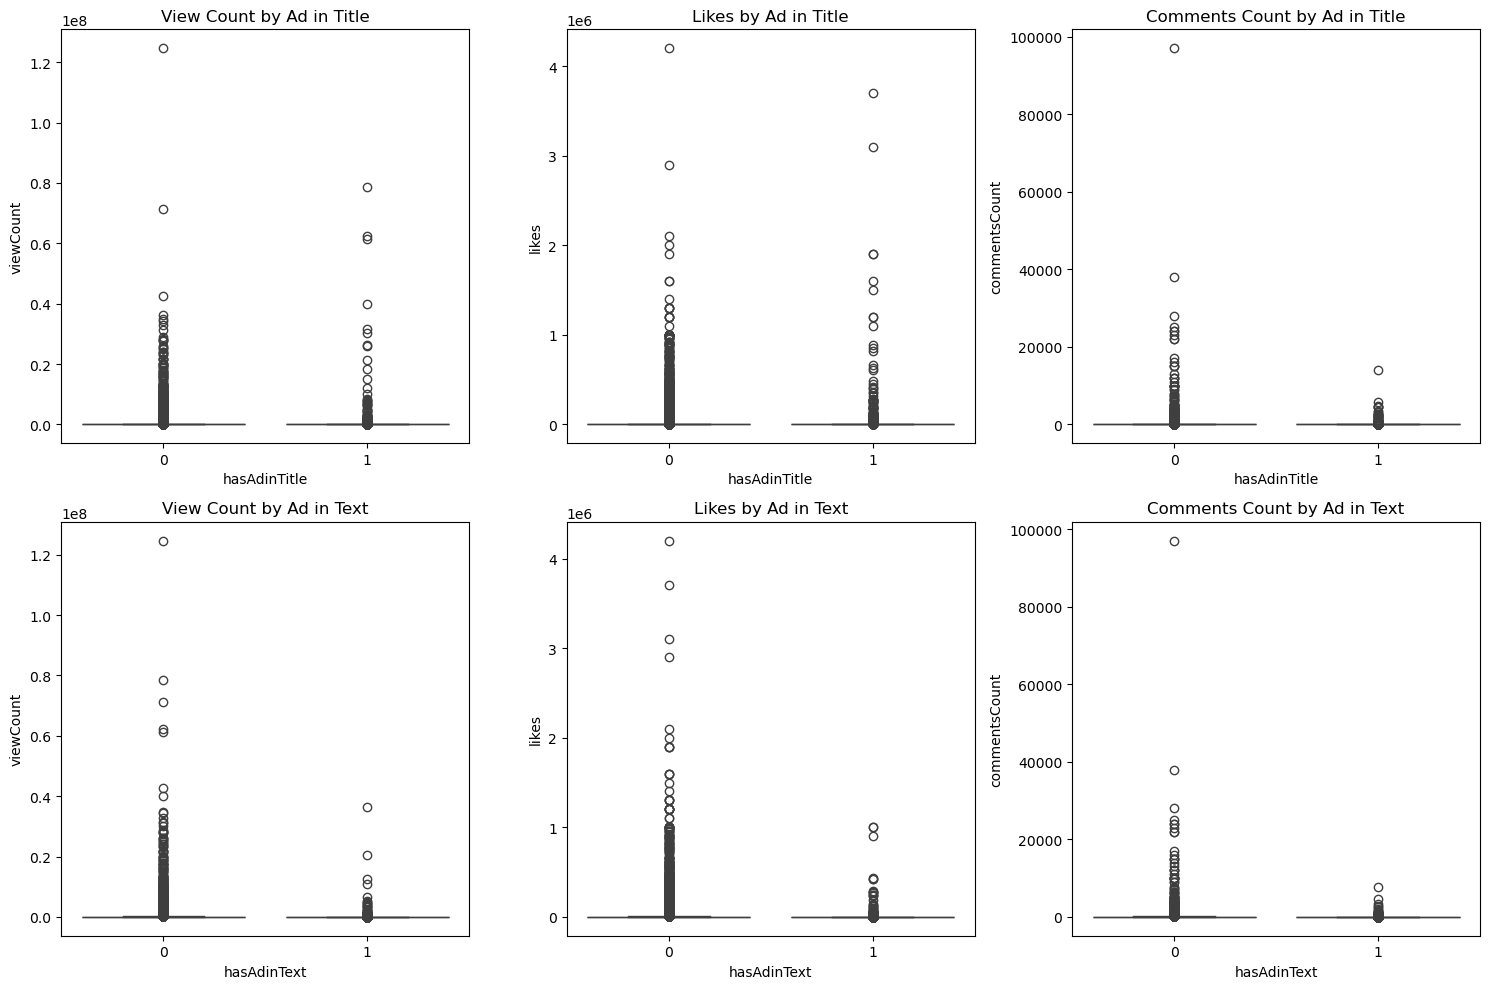

In [103]:
_, axes = plt.subplots(2, 3, figsize=(15, 10))

# plot for hasadintitle
sns.boxplot(x='hasAdinTitle', y='viewCount', data=subdf, ax=axes[0, 0])
sns.boxplot(x='hasAdinTitle', y='likes', data=subdf, ax=axes[0, 1])
sns.boxplot(x='hasAdinTitle', y='commentsCount', data=subdf, ax=axes[0, 2])
axes[0, 0].set_title('View Count by Ad in Title')
axes[0, 1].set_title('Likes by Ad in Title')
axes[0, 2].set_title('Comments Count by Ad in Title')

# plot for hasadintext
sns.boxplot(x='hasAdinText', y='viewCount', data=subdf, ax=axes[1, 0])
sns.boxplot(x='hasAdinText', y='likes', data=subdf, ax=axes[1, 1])
sns.boxplot(x='hasAdinText', y='commentsCount', data=subdf, ax=axes[1, 2])
axes[1, 0].set_title('View Count by Ad in Text')
axes[1, 1].set_title('Likes by Ad in Text')
axes[1, 2].set_title('Comments Count by Ad in Text')

plt.tight_layout()
plt.show()


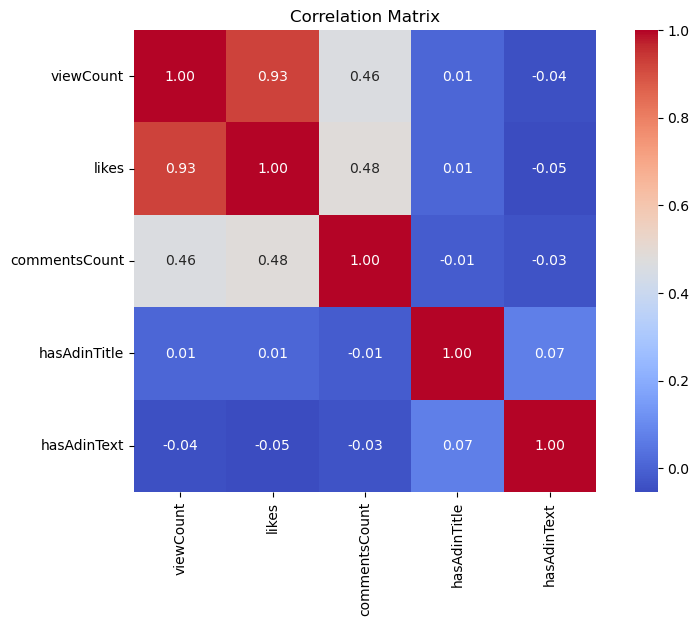

In [104]:
df_corr = subdf[['viewCount', 'likes', 'commentsCount', 'hasAdinTitle', 'hasAdinText']]

corr_matrix = df_corr.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [105]:
# perform a t-test
from scipy import stats
# t-test for viewCount
metrics = ['viewCount', 'likes', 'commentsCount']
for metric in metrics:
    t_stat, p_value = stats.ttest_ind(subdf.loc[subdf['hasAdinTitle'] == 1, metric], subdf.loc[subdf['hasAdinTitle'] == 0, metric], equal_var=False)
    print(f'T-test for {metric}: t-statistic = {t_stat}, p-value = {p_value}')
    t_stat_text, p_value_text = stats.ttest_ind(subdf.loc[subdf['hasAdinText'] == 1, metric], subdf.loc[subdf['hasAdinText'] == 0, metric], equal_var=False)
    print(f'T-test for {metric} by Ad in Text: t-statistic = {t_stat_text}, p-value = {p_value_text}')


T-test for viewCount: t-statistic = 0.9553156896778902, p-value = 0.3395436845335362
T-test for viewCount by Ad in Text: t-statistic = -9.56038140852551, p-value = 1.5764688672465137e-21
T-test for likes: t-statistic = 0.9293745539519521, p-value = 0.3528168488834674
T-test for likes by Ad in Text: t-statistic = -12.177379544913764, p-value = 7.920619395242897e-34
T-test for commentsCount: t-statistic = -3.0153472255836022, p-value = 0.0025804526602704117
T-test for commentsCount by Ad in Text: t-statistic = -9.309980336143964, p-value = 1.4570098166492167e-20


### Engagement on videos with ads vs without ads
- When the title of a video contains any hashtag related to ads, the views and likes don't differ compared to video with titles not containing ads
- One key difference is in the number of comments that are left on videos with title containing hashtags related to ads. The comments drop significantly
- When the text of a video contains any hashtag related to ads, all metrics of engagement drop significantly.

This suggests that title of a video containing the information of it being an ad doesn't affect viewership or likability of the video but people participate less actively, i.e., they tend to not leave comments on such videos

It also suggests that the text of a video containing ad related hashtags negatively affects engagement, suggesting people are averse to promotional content.

From this we can also say that the title is of less importance when it comes to engagement with a ad video or otherwise.

In [106]:
#get a list of all unique hashtags from title column and text column
hashtags = df['title'].str.extractall(r'#(\w+)')[0].value_counts()
hashtags.to_csv('unique_hashtags_in_title.csv')
hashtags = df['text'].str.extractall(r'#(\w+)')[0].value_counts()
hashtags.to_csv('unique_hashtags_in_text.csv')

In [108]:
# Filter out videos from before 15 October 2024
filtered_df = df[df['datetime_date'] >= '2024-10-15']

# Create subdf2 with the filtered data
subdf2 = filtered_df[filtered_df['duration_in_seconds'] > 60][['duration_in_seconds', 'viewCount', 'likes', 'commentsCount']]
subdf2.describe()

,duration_in_seconds,viewCount,likes,commentsCount
count,794.000000,7.940000e+02,794.000000,794.000000
mean,96.906801,2.083308e+05,16175.381612,99.459698
std,33.424759,8.788589e+05,67652.390374,423.323762
min,61.000000,3.600000e+01,0.000000,0.000000
25%,71.000000,1.853000e+03,106.000000,3.000000
50%,87.000000,8.754500e+03,644.500000,15.000000
75%,112.750000,4.749900e+04,3675.000000,51.000000
max,180.000000,1.343343e+07,998000.000000,10000.000000


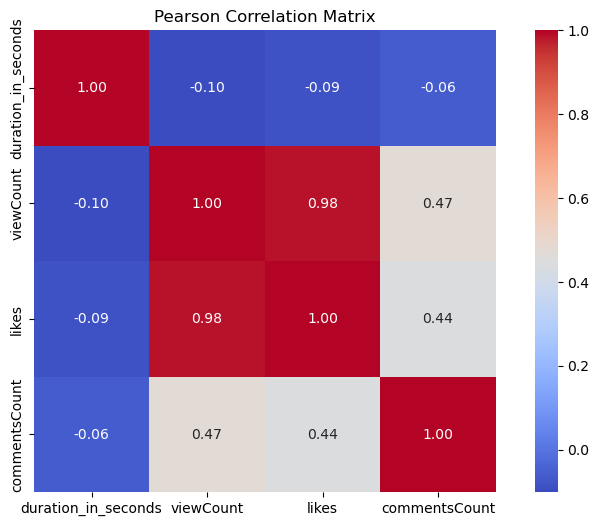

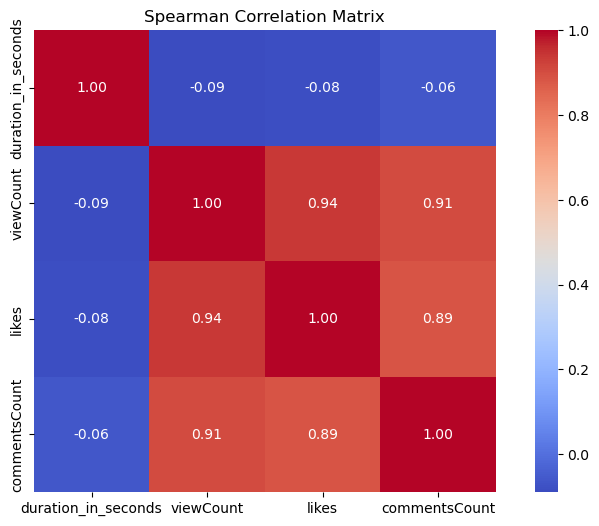

In [109]:
# Use subdf2 as df_corr2
df_corr2 = subdf2[['duration_in_seconds', 'viewCount', 'likes', 'commentsCount']]

pearson_corr = df_corr2.corr(method='pearson')
spearman_corr = df_corr2.corr(method='spearman')

# Plot Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

# Plot Spearman correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()


### Correlation between video length and views likes & comments
There is no direction relation between duration and any of the given metrics

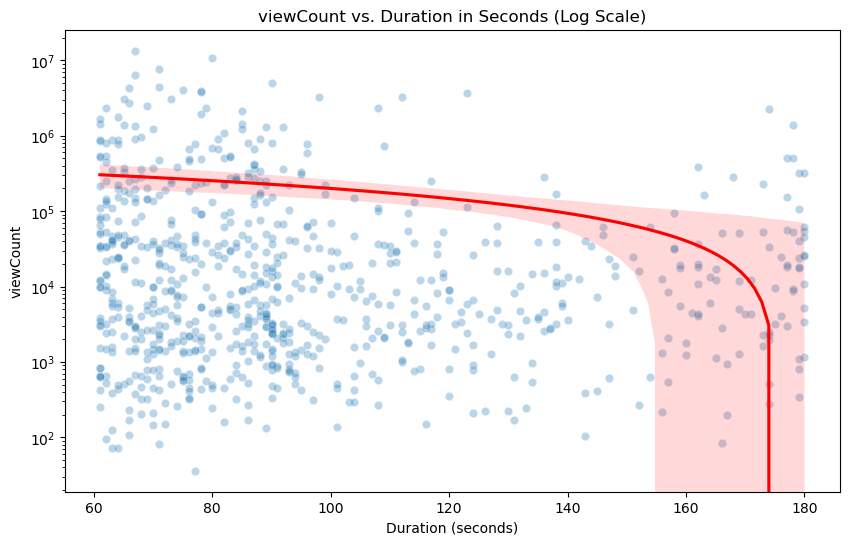

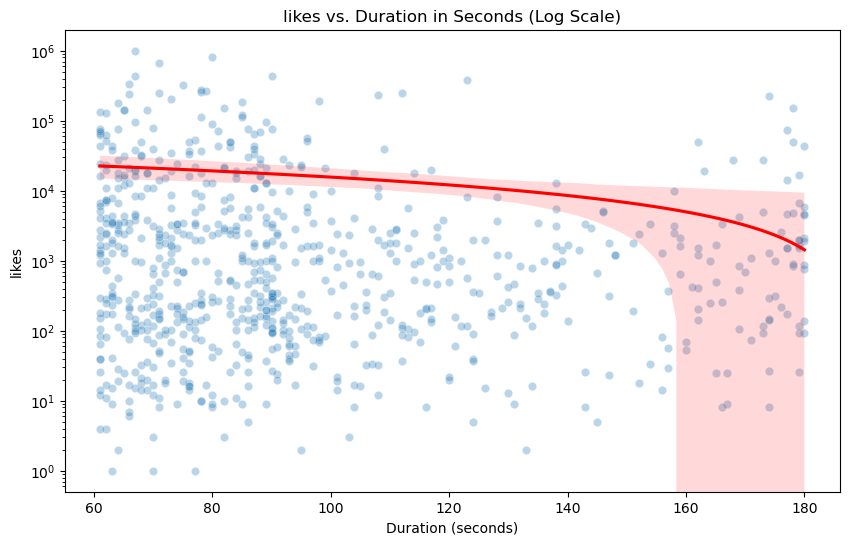

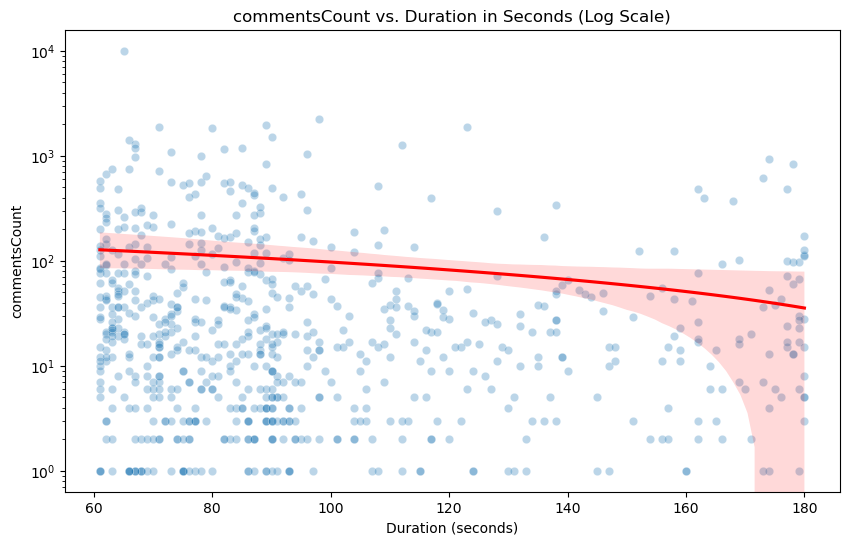

In [111]:
for metric in ['viewCount', 'likes', 'commentsCount']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='duration_in_seconds', y=metric, data=subdf2, alpha=0.3)
    sns.regplot(x='duration_in_seconds', y=metric, data=subdf2, scatter=False, color='red')
    plt.yscale('log')
    plt.title(f'{metric} vs. Duration in Seconds (Log Scale)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel(metric)
    plt.show()

### Engagement trend for longer duration videos
As the length of the video increases the engagement on the video drops, not too significantly but it does drop. 

In [112]:
# Filter the dataframe
filtered_df = df[df['datetime_date'] >= '2024-10-15']

# Create duration bins
filtered_df['duration_bin'] = pd.cut(filtered_df['duration_in_seconds'], bins=[0, 30, 60, float('inf')], labels=['Short', 'Medium', 'Long'])

# Perform t-tests
for metric in metrics:
    for group1, group2 in [('Short', 'Medium'), ('Medium', 'Long'), ('Short', 'Long')]:
        t_stat, p_value = stats.ttest_ind(
            filtered_df.loc[filtered_df['duration_bin'] == group1, metric],
            filtered_df.loc[filtered_df['duration_bin'] == group2, metric],
            equal_var=False
        )
        print(f'T-test for {metric} ({group1} vs {group2}): t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

T-test for viewCount (Short vs Medium): t-statistic = -5.4889, p-value = 0.0000
T-test for viewCount (Medium vs Long): t-statistic = 1.9103, p-value = 0.0562
T-test for viewCount (Short vs Long): t-statistic = -2.4881, p-value = 0.0130
T-test for likes (Short vs Medium): t-statistic = -6.9884, p-value = 0.0000
T-test for likes (Medium vs Long): t-statistic = 0.4696, p-value = 0.6387
T-test for likes (Short vs Long): t-statistic = -3.6614, p-value = 0.0003
T-test for commentsCount (Short vs Medium): t-statistic = -5.4502, p-value = 0.0000
T-test for commentsCount (Medium vs Long): t-statistic = 2.5913, p-value = 0.0096
T-test for commentsCount (Short vs Long): t-statistic = -3.3200, p-value = 0.0009


/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/4246194210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['duration_bin'] = pd.cut(filtered_df['duration_in_seconds'], bins=[0, 30, 60, float('inf')], labels=['Short', 'Medium', 'Long'])


### Comparison between different video lengths
- Short vs Medium : Shorter length videos have lesser views, likes and comments compared to Medium length videos
- Medium vs Long : Medium length videos have more views, likes and comments compared to Medium length videos
- Short vs Long : Shorter videos have less likes and comments but the difference is not significant


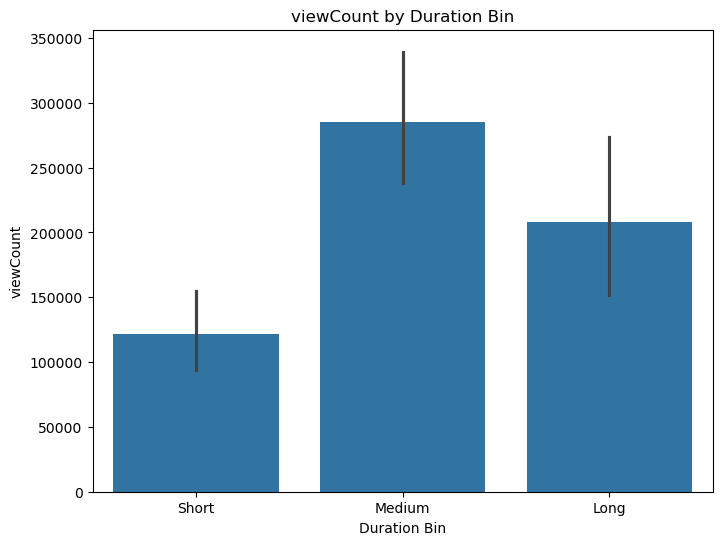

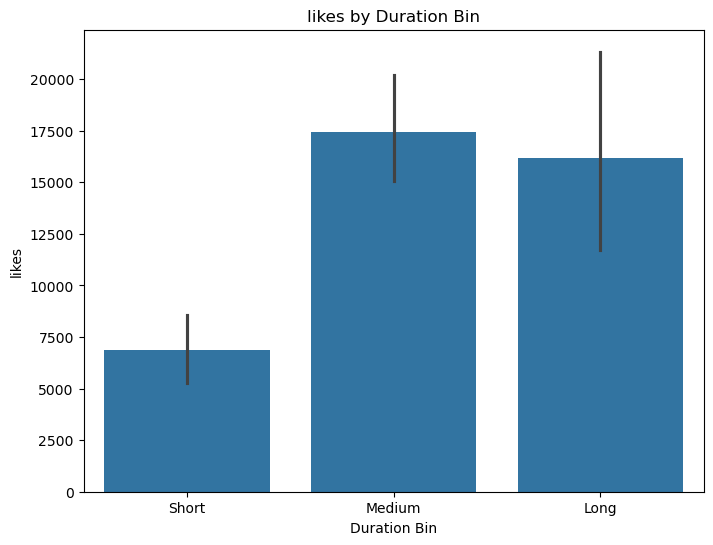

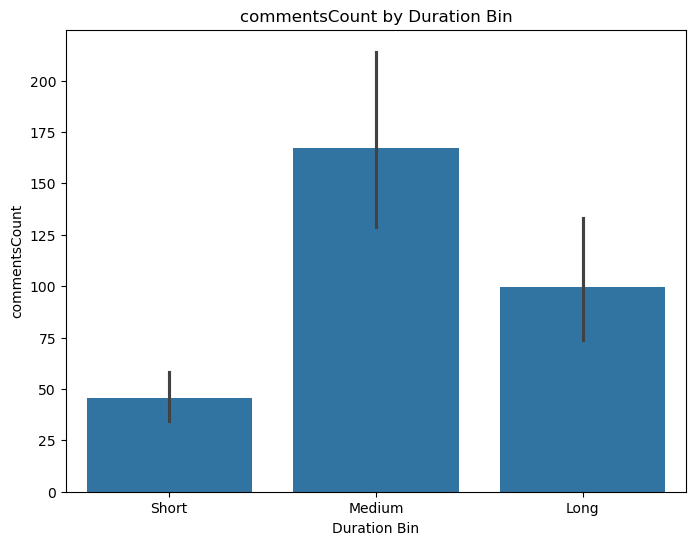

In [113]:
for metric in ['viewCount', 'likes', 'commentsCount']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='duration_bin', y=metric, data=filtered_df)
    plt.title(f'{metric} by Duration Bin')
    plt.xlabel('Duration Bin')
    plt.ylabel(metric)
    plt.show()

### Engagement trend by duration
From the above bar plots its evident that medium duration (30-60s) videos perform the best in terms of views, likes and comments.

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/2160846520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['datetime_date'] = pd.to_datetime(df['datetime_date'], errors='coerce')
/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/2160846520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['hasAdinText'] = subdf['hasAdinText'].astype(int)
/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/2160846520.py:5: SettingWithCopyWarning: 
A value is tryi

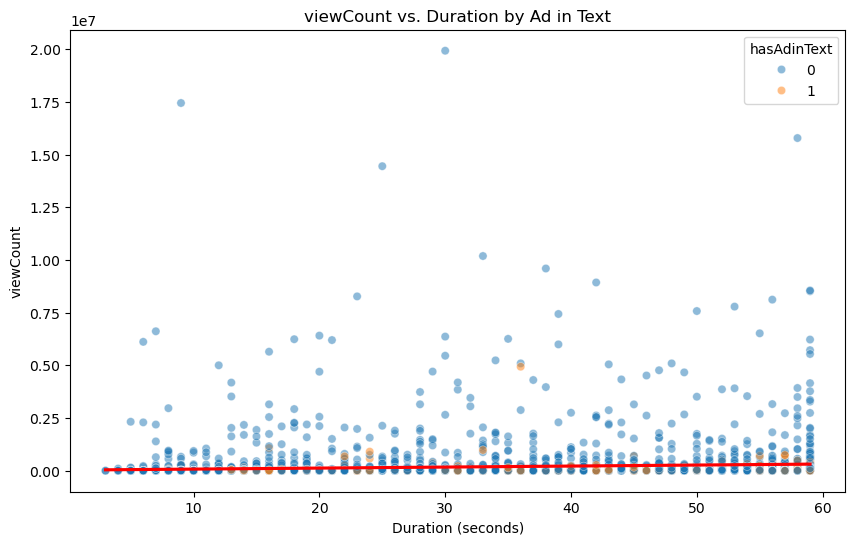

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/2160846520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration_ad'] = X['duration_in_seconds'] * X['hasAdinText']



Interaction Regression for viewCount:
                            OLS Regression Results                            
Dep. Variable:              viewCount   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     25.97
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.17e-16
Time:                        11:13:26   Log-Likelihood:                -71187.
No. Observations:                4728   AIC:                         1.424e+05
Df Residuals:                    4724   BIC:                         1.424e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

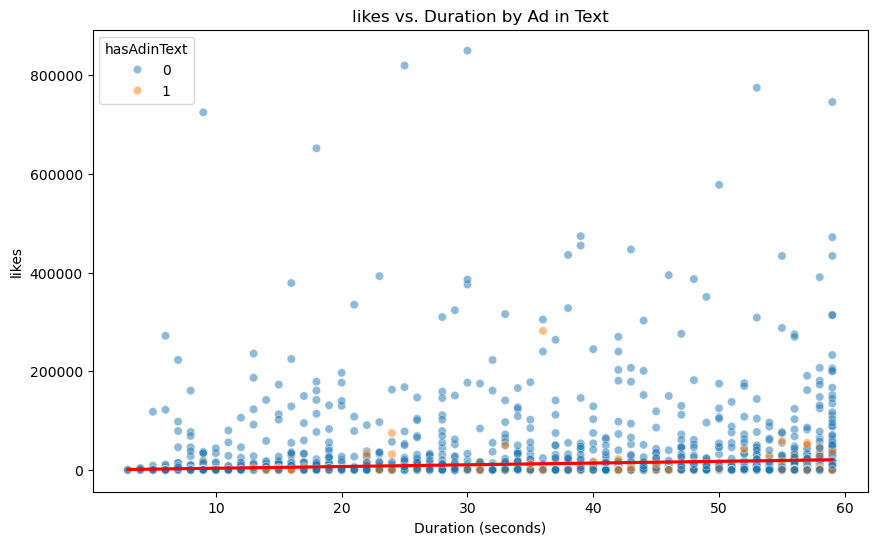

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/2160846520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration_ad'] = X['duration_in_seconds'] * X['hasAdinText']



Interaction Regression for likes:
                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     38.44
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.55e-24
Time:                        11:13:26   Log-Likelihood:                -57553.
No. Observations:                4728   AIC:                         1.151e+05
Df Residuals:                    4724   BIC:                         1.151e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

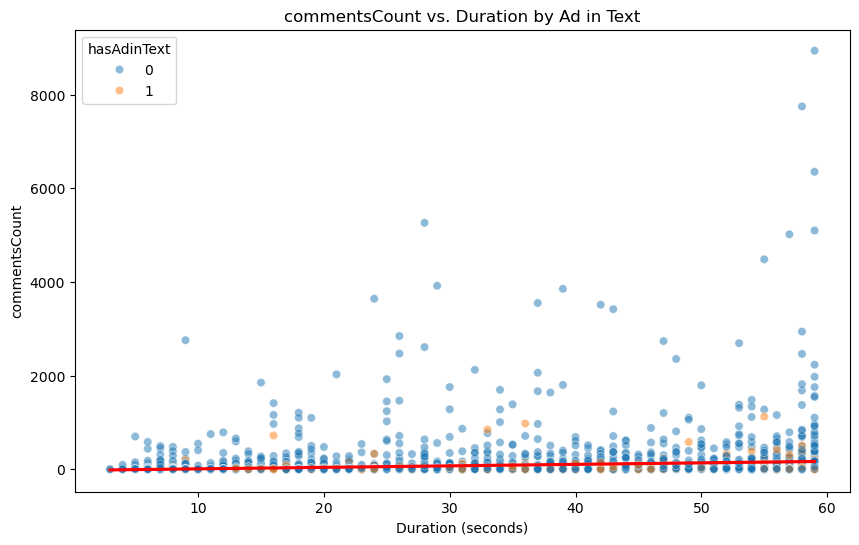


Interaction Regression for commentsCount:
                            OLS Regression Results                            
Dep. Variable:          commentsCount   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     50.39
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           4.72e-32
Time:                        11:13:27   Log-Likelihood:                -34277.
No. Observations:                4728   AIC:                         6.856e+04
Df Residuals:                    4724   BIC:                         6.859e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/2160846520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration_ad'] = X['duration_in_seconds'] * X['hasAdinText']


In [116]:
import statsmodels.api as sm    

subdf['datetime_date'] = pd.to_datetime(df['datetime_date'], errors='coerce')
subdf['hasAdinText'] = subdf['hasAdinText'].astype(int)
subdf['hasAdinTitle'] = subdf['hasAdinTitle'].astype(int)
# Filter the data
filtered_subdf = subdf[(subdf['datetime_date'] >= '2024-10-15') & 
                       (subdf['duration_in_seconds'] < 60) & 
                       (subdf['viewCount'] < 0.2e8) & 
                       (subdf['likes'] < 1e6) & 
                       (subdf['commentsCount'] < 10000)]

for metric in ['viewCount', 'likes', 'commentsCount']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='duration_in_seconds', y=metric, hue='hasAdinText', data=filtered_subdf, alpha=0.5)
    sns.regplot(x='duration_in_seconds', y=metric, data=filtered_subdf, scatter=False, color='red')
    # sns.regplot(x='hasAdinText', y=metric, data=filtered_subdf, scatter=False, color='green')
    plt.title(f'{metric} vs. Duration by Ad in Text')
    plt.xlabel('Duration (seconds)')
    plt.ylabel(metric)
    # plt.yscale('log')
    plt.show()

    # Regression with interaction
    X = filtered_subdf[['duration_in_seconds', 'hasAdinText']]
    X['duration_ad'] = X['duration_in_seconds'] * X['hasAdinText']
    X = sm.add_constant(X)
    y = filtered_subdf[metric]
    model = sm.OLS(y, X).fit()
    print(f"\nInteraction Regression for {metric}:")
    print(model.summary())

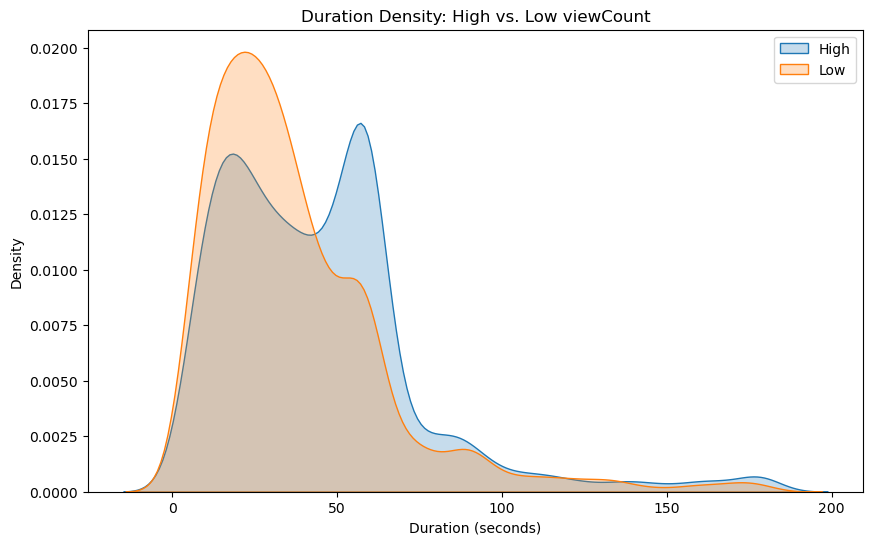

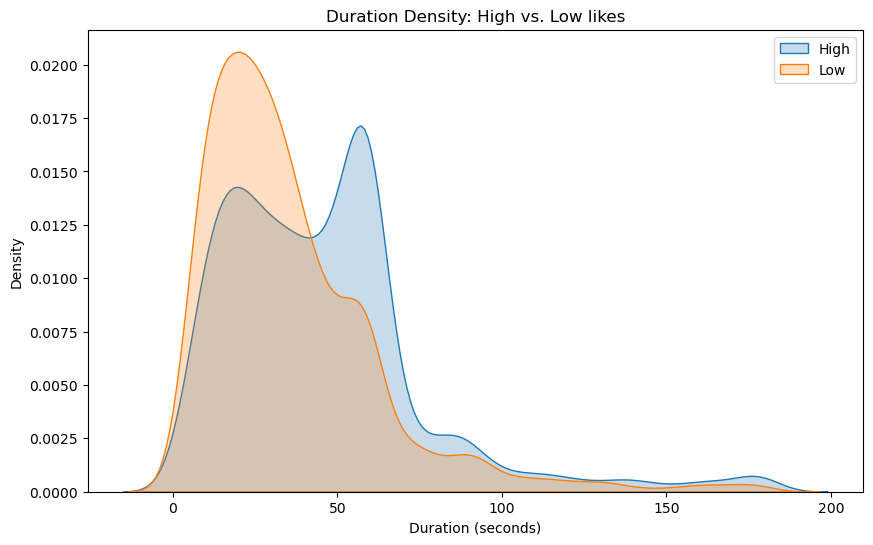

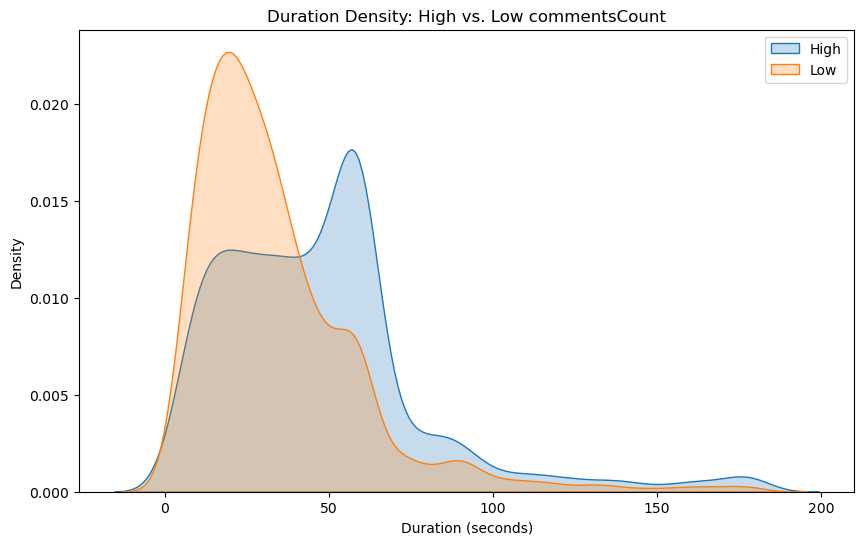

In [118]:
for metric in ['viewCount', 'likes', 'commentsCount']:
    median_val = filtered_df[metric].median()
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=filtered_df[filtered_df[metric] > median_val], x='duration_in_seconds', label='High', fill=True)
    sns.kdeplot(data=filtered_df[filtered_df[metric] <= median_val], x='duration_in_seconds', label='Low', fill=True)
    plt.title(f'Duration Density: High vs. Low {metric}')
    plt.xlabel('Duration (seconds)')
    plt.legend()
    plt.show()

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/233081699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['has_emoji_title'] = subdf['title'].apply(has_emoji).astype(int)


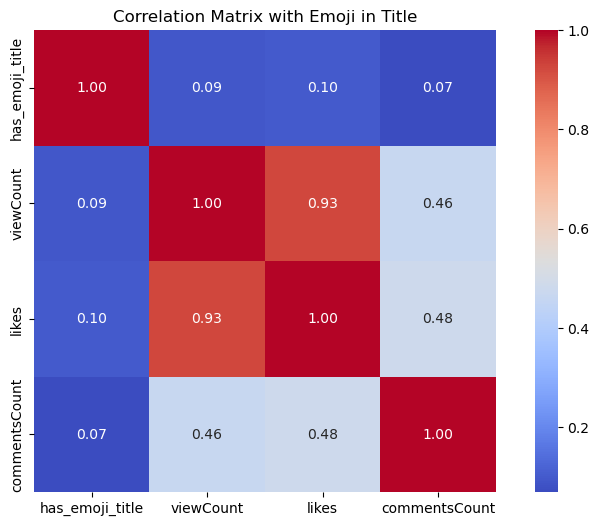

In [123]:
#check if the text column has emoji in it
import emoji
def has_emoji(s):
    return any(char in emoji.EMOJI_DATA for char in s)
# subdf['has_emoji'] = subdf['text'].fillna('').apply(has_emoji).astype(int)
# do the same for title column
subdf['has_emoji_title'] = subdf['title'].apply(has_emoji).astype(int)
# Draw a correlation heatmap for the new column against views likes and comments
df_corr_emoji = subdf[['has_emoji_title', 'viewCount', 'likes', 'commentsCount']]
corr_emoji_matrix = df_corr_emoji.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_emoji_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix with Emoji in Title')
plt.show()


In [125]:
# perform t-tests on the has_emoji_title column against views likes and comments
for metric in ['viewCount', 'likes', 'commentsCount']:
    t_stat_emoji, p_value_emoji = stats.ttest_ind(subdf.loc[subdf['has_emoji_title'] == 1, metric], 
                                                  subdf.loc[subdf['has_emoji_title'] == 0, metric], 
                                                  equal_var=False)
    print(f'T-test for {metric} by Emoji in Title: t-statistic = {t_stat_emoji:.4f}, p-value = {p_value_emoji:.4f}')

T-test for viewCount by Emoji in Title: t-statistic = 10.8319, p-value = 0.0000
T-test for likes by Emoji in Title: t-statistic = 11.7737, p-value = 0.0000
T-test for commentsCount by Emoji in Title: t-statistic = 8.0402, p-value = 0.0000


In [129]:
# from scipy import stats

for metric in metrics:
    t_stat, p_value = stats.ttest_ind(
        subdf.loc[subdf['has_emoji_title'] == 1, metric],
        subdf.loc[subdf['has_emoji_title'] == 0, metric],
        equal_var=False
    )
    print(f'T-test for {metric}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

T-test for viewCount: t-statistic = 10.8319, p-value = 0.0000
T-test for likes: t-statistic = 11.7737, p-value = 0.0000
T-test for commentsCount: t-statistic = 8.0402, p-value = 0.0000


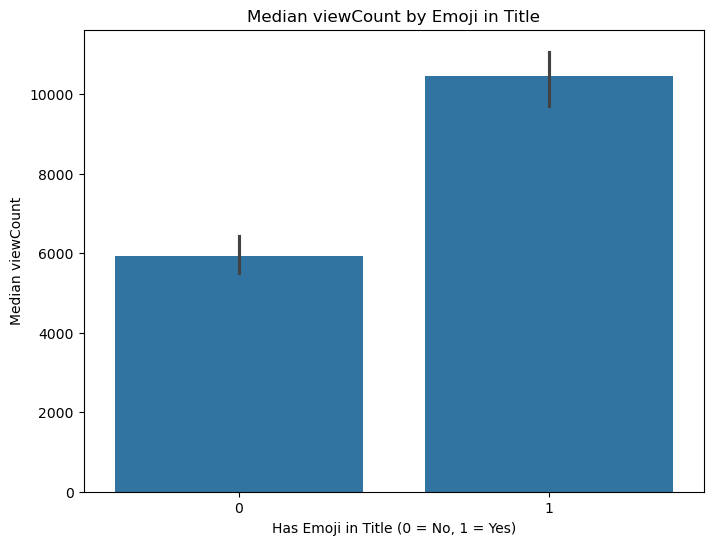

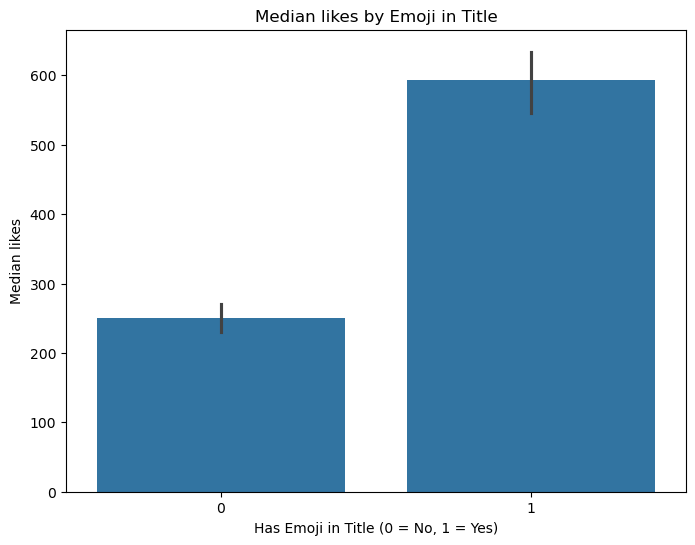

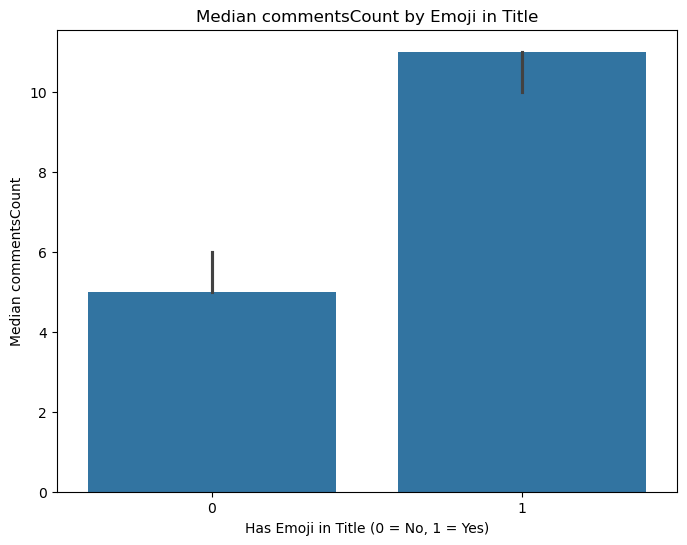

In [135]:
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='has_emoji_title', y=metric, data=subdf, estimator='median')  # or 'median'
    plt.title(f'Median {metric} by Emoji in Title')
    plt.xlabel('Has Emoji in Title (0 = No, 1 = Yes)')
    plt.ylabel(f'Median {metric}')
    plt.show()

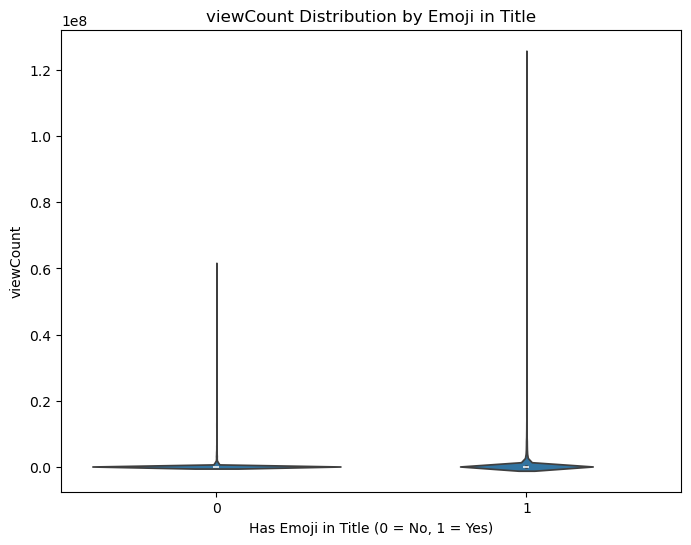

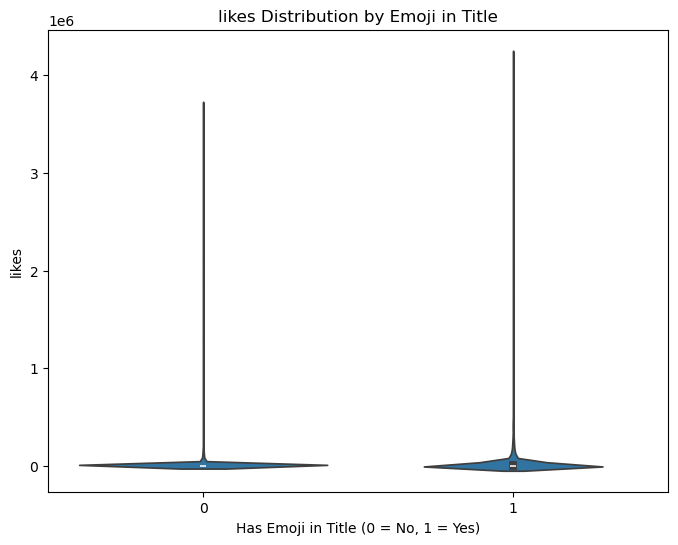

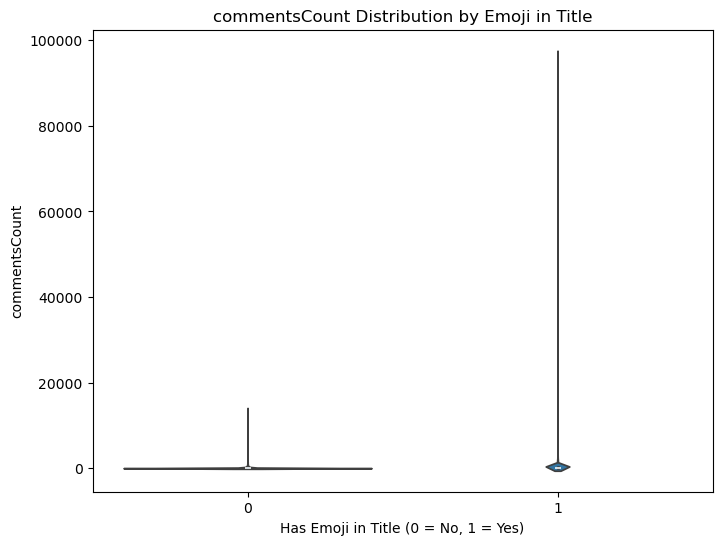

In [137]:
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='has_emoji_title', y=metric, data=subdf)
    plt.title(f'{metric} Distribution by Emoji in Title')
    plt.xlabel('Has Emoji in Title (0 = No, 1 = Yes)')
    plt.ylabel(metric)
    plt.show()

In [139]:
import seaborn as sns
sns.catplot(x='has_emoji_title', y='likes', hue='duration_bin', kind='bar', data=subdf)
plt.title('Likes by Emoji in Title and Duration Bin')
plt.show()

ValueError: Could not interpret value `duration_bin` for `hue`. An entry with this name does not appear in `data`.